<a href="https://colab.research.google.com/github/ZeynelAbidin91/DL-in-Computer-vision/blob/master/Renewed_CNN_cat_dog_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils #???
from keras import backend as K
from keras.optimizers import Adam

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG # ????
from keras.utils.vis_utils import model_to_dot 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using Keras version: 2.4.3 backend: tensorflow


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files # to load image data     
uploaded = files.upload()

Saving Data.zip to Data.zip


In [ ]:
!unzip Data.zip # 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_gen = ImageDataGenerator() # to convert images in a directory to a dataset 
train_set = dataset_gen.flow_from_directory('Data/train/',
                                            class_mode='binary',
                                            target_size=(150, 150), 
                                            batch_size=32)
eval_set = dataset_gen.flow_from_directory('Data/eval/', class_mode='binary',
                                           target_size=(150, 150), 
                                           batch_size=32)
test_set = dataset_gen.flow_from_directory('Data/test/', class_mode='binary',
                                           target_size=(150, 150), 
                                           batch_size=32)

Found 10000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
print("Train set includes:", len(train_set), "batches")
print("Eval set includes:", len(eval_set), "batches")
print("Test set includes:", len(test_set), "batches")

Train set includes: 313 batches
Eval set includes: 125 batches
Test set includes: 32 batches


In [ ]:
input_shape = train_set[0][0].shape[1:4] # shape of inputs for CNN model

In [ ]:
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

In [ ]:
def define_model(): # CNN image classifier model as function

  model = Sequential()

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same',
                 input_shape=input_shape))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same'))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=pool_size))
  #model.add(Dropout(0.25))

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same'))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same'))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Dropout(0.2))

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same'))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same'))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Dropout(0.2))

  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same'))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(nb_filters, kernel_size,
                 padding='same'))
  #model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=pool_size))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(units=512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model
#print(model.summary())


In [ ]:
model = define_model() 
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 32)        1

In [ ]:
%%time

epochs = 10 

#fitting train data to CNN model
history = model.fit_generator(train_set,steps_per_epoch=len(train_set), 
                              epochs=epochs, validation_data=eval_set, 
                              validation_steps=len(eval_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
313/313 [==============================] - 39s 124ms/step - loss: 0.7455 - accuracy: 0.6115 - val_loss: 0.6201 - val_accuracy: 0.6747
Epoch 2/10
313/313 [==============================] - 39s 124ms/step - loss: 0.5964 - accuracy: 0.6797 - val_loss: 0.5832 - val_accuracy: 0.7188
Epoch 3/10
313/313 [==============================] - 39s 124ms/step - loss: 0.5630 - accuracy: 0.7102 - val_loss: 0.5885 - val_accuracy: 0.6957
Epoch 4/10
313/313 [==============================] - 39s 123ms/step - loss: 0.5355 - accuracy: 0.7303 - val_loss: 0.5531 - val_accuracy: 0.7088
Epoch 5/10
313/313 [==============================] - 40s 129ms/step - loss: 0.5102 - accuracy: 0.7552 - val_loss: 0.5161 - val_accuracy: 0.7558
Epoch 6/10
313/313 [==============================] - 43s 138ms/step - loss: 0.4788 - accuracy: 0.7771 - val_loss: 0.5147 - val_accuracy: 0.7640
Epoch 7/10
313/313 [==============================] - 

Text(0.5, 1.0, 'accuracy')

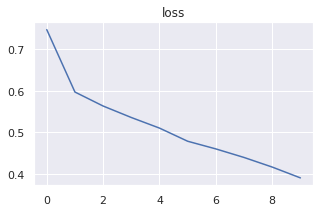

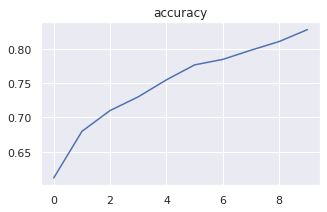

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy')

In [ ]:
%%time
# evaluate performance on train & test data
loss, acc = model.evaluate_generator(train_set, steps=len(aug_train_set), verbose=1)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate_generator(eval_set, steps=len(aug_eval_set), verbose=1)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate_generator(test_set, steps=len(aug_test_set), verbose=1)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

313/313 [==============================] - 26s 84ms/step - loss: 0.3666 - accuracy: 0.8404
Training data  -> loss: 0.367, acc: 0.840
125/125 [==============================] - 11s 84ms/step - loss: 0.4891 - accuracy: 0.7880
Cross-val data -> loss: 0.489, acc: 0.788
32/32 [==============================] - 3s 79ms/step - loss: 0.4651 - accuracy: 0.8060
Testing data   -> loss: 0.465, acc: 0.806
CPU times: user 39.8 s, sys: 2.33 s, total: 42.2 s
Wall time: 39.9 s



Model | Train | Cross-val | Test
--- | --- | --- | ---
Base-model | 0.84 | 0.78 | 0.80

 


*   Without image augmentation, we have expected accuracy outputs. 

*   With more epochs, we assume that we can get larger difference between train and test sets since we don't see same behaviour from cross-val accuracy comparing to train accuracy.






















**CNN Model with Image Augmentation**

In [ ]:
# The best results obtained with below features, the result whisch is 78%
train_data_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

scaled_data_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
aug_train_set = train_data_gen.flow_from_directory('Data/train/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary', 
                                                   batch_size=32)
aug_eval_set = scaled_data_gen.flow_from_directory('Data/eval/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary',
                                                   batch_size=32)
aug_test_set = scaled_data_gen.flow_from_directory('Data/test/', 
                                                   target_size=(150, 150),
                                                   class_mode='binary', 
                                                   batch_size=32)

Found 10000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
input_shape = aug_train_set[0][0].shape[1:4]
input_shape

(150, 150, 3)

In [ ]:
model_aug = define_model()

In [ ]:
%%time

epochs = 10 

history = model_aug.fit_generator(aug_train_set,
                                  steps_per_epoch=len(aug_train_set), 
                                  epochs=epochs, validation_data=aug_eval_set, 
                                  validation_steps=len(aug_eval_set))

Epoch 1/10
313/313 [==============================] - 89s 285ms/step - loss: 0.7666 - accuracy: 0.5797 - val_loss: 0.9806 - val_accuracy: 0.5268
Epoch 2/10
313/313 [==============================] - 86s 274ms/step - loss: 0.6466 - accuracy: 0.6262 - val_loss: 0.6604 - val_accuracy: 0.6223
Epoch 3/10
313/313 [==============================] - 84s 269ms/step - loss: 0.6300 - accuracy: 0.6476 - val_loss: 0.5882 - val_accuracy: 0.7125
Epoch 4/10
313/313 [==============================] - 84s 269ms/step - loss: 0.6176 - accuracy: 0.6640 - val_loss: 0.5995 - val_accuracy: 0.6830
Epoch 5/10
313/313 [==============================] - 85s 273ms/step - loss: 0.6084 - accuracy: 0.6650 - val_loss: 0.6284 - val_accuracy: 0.6825
Epoch 6/10
313/313 [==============================] - 86s 276ms/step - loss: 0.6009 - accuracy: 0.6805 - val_loss: 0.8276 - val_accuracy: 0.6488
Epoch 7/10
313/313 [==============================] - 88s 280ms/step - loss: 0.5917 - accuracy: 0.6845 - val_loss: 1.0276 - val_ac

In [ ]:
# evaluate performance on train & test data
loss, acc = model_aug.evaluate_generator(aug_train_set, steps=len(aug_train_set), verbose=1)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model_aug.evaluate_generator(aug_eval_set, steps=len(aug_eval_set), verbose=1)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model_aug.evaluate_generator(aug_test_set, steps=len(aug_test_set), verbose=1)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

Instructions for updating:
Please use Model.evaluate, which supports generators.
313/313 [==============================] - 72s 230ms/step - loss: 0.5345 - accuracy: 0.7310
Training data  -> loss: 0.535, acc: 0.731
125/125 [==============================] - 11s 92ms/step - loss: 0.5296 - accuracy: 0.7508
Cross-val data -> loss: 0.530, acc: 0.751
32/32 [==============================] - 3s 90ms/step - loss: 0.5108 - accuracy: 0.7590
Testing data   -> loss: 0.511, acc: 0.759



Model | Train | Cross-val | Test
--- | --- | --- | ---
Base-model | 0.84 | 0.78 | 0.80
Augmented model | 0.73 | 0.75 | 0.76

 


*   With image augmentation, there is no larger gap between train and test sets.

*   By increasing epoch number, accuracies follow each other in comprassion with base-model. That shows with augmented images we prevent overfitting.

Text(0.5, 1.0, 'accuracy')

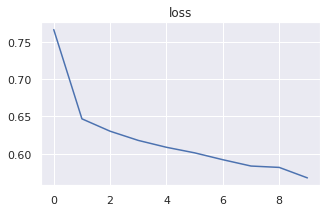

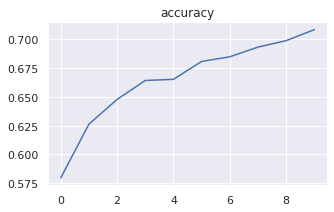

In [ ]:
#@title Default title text
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy')